In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import Data, CellListPlot, IterCellPlot, AutoIterCellPlot, save, load, CellPlot
import os
import mahotas as mh

In [30]:
import colicoords
colicoords.__file__

'C:\\Users\\jhs\\Programming\\cc_master\\colicoords\\__init__.py'

In [2]:
c41_02_raw = load('c41_02_cell_raw.hdf5')
c41_03_raw = load('c41_03_cell_raw.hdf5')

In [3]:
c41_02_binary = c41_02_raw.copy()
res_c41_02 = c41_02_binary.optimize_mp()

In [5]:
c41_03_binary = c41_03_raw.copy()
res_c41_03 = c41_03_binary.optimize_mp()

In [6]:
np.where(np.equal(res_c41_02, None))

(array([], dtype=int64),)

In [7]:
np.where(np.equal(res_c41_03, None))

(array([], dtype=int64),)

In [8]:
bn = ~np.equal(c41_02_binary, None)

In [9]:
obj_c41_02 = np.array([r.objective_value for r in np.array(res_c41_02)[bn]])
a_c41_02 = np.array([c.data.binary_img.sum() for c in c41_02_binary[bn]])
f = obj_c41_02 / a_c41_02

<IPython.core.display.Javascript object>


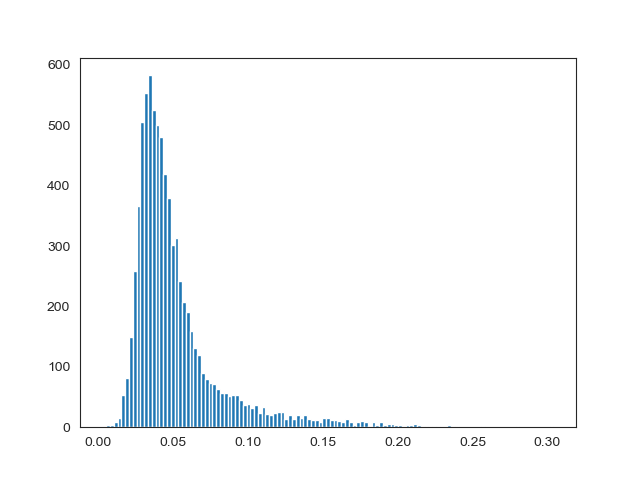

In [10]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


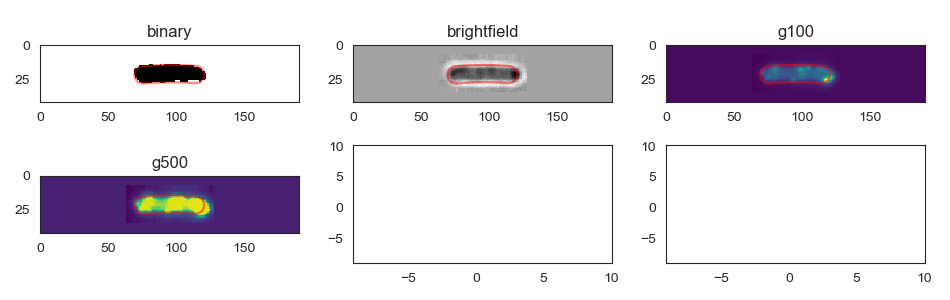

In [11]:
b = f < 0.1
aicp = AutoIterCellPlot(c41_02_binary[bn][b])
aicp.plot()

In [12]:
c41_02_selected = c41_02_binary[bn][b]

In [13]:
save('c41_02_binary_opt.hdf5', c41_02_selected)

In [16]:
bn = ~np.equal(res_c41_03, None)

In [17]:
obj_c41_03 = np.array([r.objective_value for r in np.array(res_c41_03)[bn]])
a_c41_03 = np.array([c.data.binary_img.sum() for c in c41_03_binary[bn]])
f = obj_c41_03 / a_c41_03

<IPython.core.display.Javascript object>


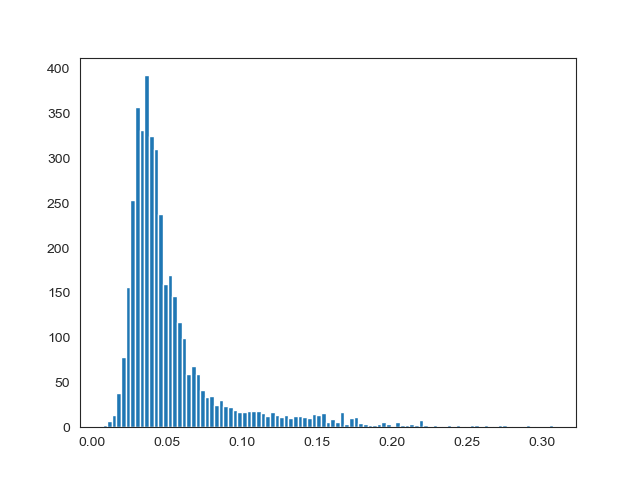

In [18]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


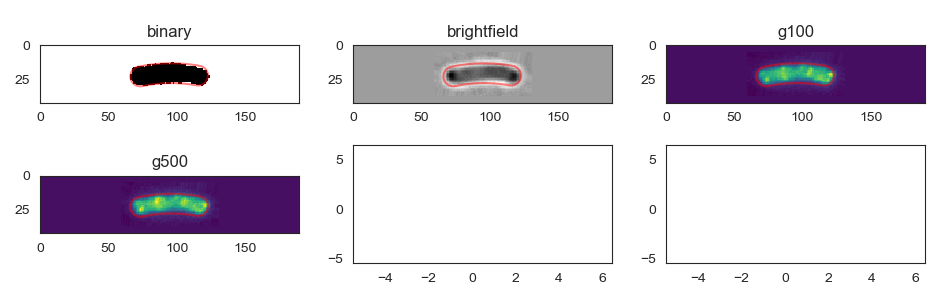

In [19]:
b = f < 0.1
aicp = AutoIterCellPlot(c41_03_binary[bn][b])
aicp.plot()

In [20]:
c41_03_selected = c41_03_binary[bn][b]

In [21]:
save('c41_03_binary_opt.hdf5', c41_03_selected)